Data mining or machine learning is very useful when you are trying to predict or gain insight from data. There are many algorithms: linear regression, regression decision trees, SVM, logistic regression, deep learning models, etc. We group them into two buckets, supervised models and unsupervised models.

Supervised models: are models that use labeled data to find ways or models to predict new information. Algorithms like regressions, decision trees, k nearest neighbors, and SVMS are in this category

unsupervised: do not use labels and try to find some commonality amongst the data. Algorithms like knn, clustering models, and other models that try to infer certain relationships fit this mold. 



Let's play around with an unsupervised model to showcase what you can do with machine learning

In [5]:
from sklearn.datasets import make_blobs
import pandas as pd
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, n_features=3, random_state=78, cluster_std=3)

dummy_test=pd.DataFrame(X, columns=['temperature', 'Feature2', 'Feature3'])

#dummy_test['Target']=y we could have used the response variable if we wanted to toy around with supervised models. That might be data mining 102 who knows. 
dummy_test.head(20)



,temperature,Feature2,Feature3
0,4.844697,-6.237337,-7.285891
1,6.309623,9.719444,3.490302
2,7.190027,10.436891,-0.747045
3,8.218694,3.629903,1.538102
4,-13.053499,1.158304,5.471713
5,11.627262,12.304815,-1.710409
6,4.931428,7.012831,-5.121899
7,9.673767,-3.930189,-10.094903
8,5.615043,-3.165291,-4.706215
9,7.208296,-2.622087,-11.050165


In [3]:
#I have covered pandas quite a bit but the describe function is very useful especially when you want to get a quick glance on the numerical features
dummy_test.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,1.277212,2.602857,-1.285378
std,7.938019,6.751350,6.550327
min,-18.380424,-16.083573,-18.200801
25%,-6.875017,-3.203360,-6.710733
50%,4.440956,3.451349,-1.123990
75%,7.379662,7.956803,4.282820
max,15.899882,18.986475,17.040140


we can take this a step further and use the solid pandas profiler to do some data exploration. I like using this application to get a rundown of the statistics and visualize the data.

It is not overly important for this example

In [6]:
from pandas_profiling import ProfileReport

ProfileReport(dummy_test)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,3
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,23.6 KiB
Average record size in memory,24.1 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


It is also very helpful to look at null values. In many situations you have to have a plan to handle nan or null values. Most machine learning algorithms can't handle missing values! 

In [4]:
dummy_test.isnull().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
X.shape

(1000, 3)

In [11]:
!pip install hvplot
#google colab env

     |████████████████████████████████| 2.5MB 2.8MB/s 
     |████████████████████████████████| 1.6MB 21.9MB/s 
     |████████████████████████████████| 4.0MB 30.8MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 


In [12]:
#lets import some libraries and make some predictions!
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans

In [14]:
#let's initialize the model with 3 clusters since we made a makeshift dataset with 3 clusters
#you will generally have to tune the parameters to get it work with your data, which usually involves the number of clusters parameter (review sklearn KMEANS documentation)

model=KMeans(n_clusters=3, random_state=5)

model.fit(dummy_test)

#once model is fit we can now generate some predictions

predictions=model.predict(dummy_test)
predictions 



array([0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 2,
       0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 1, 2, 0,
       2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       2, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 0, 2, 1,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 2, 0, 0,

In [15]:
#lets append these predictions to the pandas dataframe
'''as an aside we can use these classes to profile records or different types of patrons at a restaurant for example. Clustering algorithms can actually be used as input (eg the class column)
for supervised models also. Those models would simply use the generated labels from our clustering algorithm as the labels. 

'''

dummy_test['class']=predictions

dummy_test

,temperature,Feature2,Feature3,class
0,4.844697,-6.237337,-7.285891,0
1,6.309623,9.719444,3.490302,2
2,7.190027,10.436891,-0.747045,2
3,8.218694,3.629903,1.538102,2
4,-13.053499,1.158304,5.471713,1
...,...,...,...,...
995,11.451068,-2.588215,-9.767385,0
996,3.786632,1.447773,-7.657070,0
997,5.225590,-6.068185,-14.633154,0
998,10.047197,-9.698432,-6.950195,0


In [19]:
#oftentimes we visualize data with 2d scatterplots. Hvplots 3d scatterplot give us another dimension to look at. This library is very powerful. I'd recommend you to check out its 
#documentation

fig=px.scatter_3d(dummy_test, x='temperature', y='Feature2', z='Feature3', color='class')

fig.show()

In [20]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


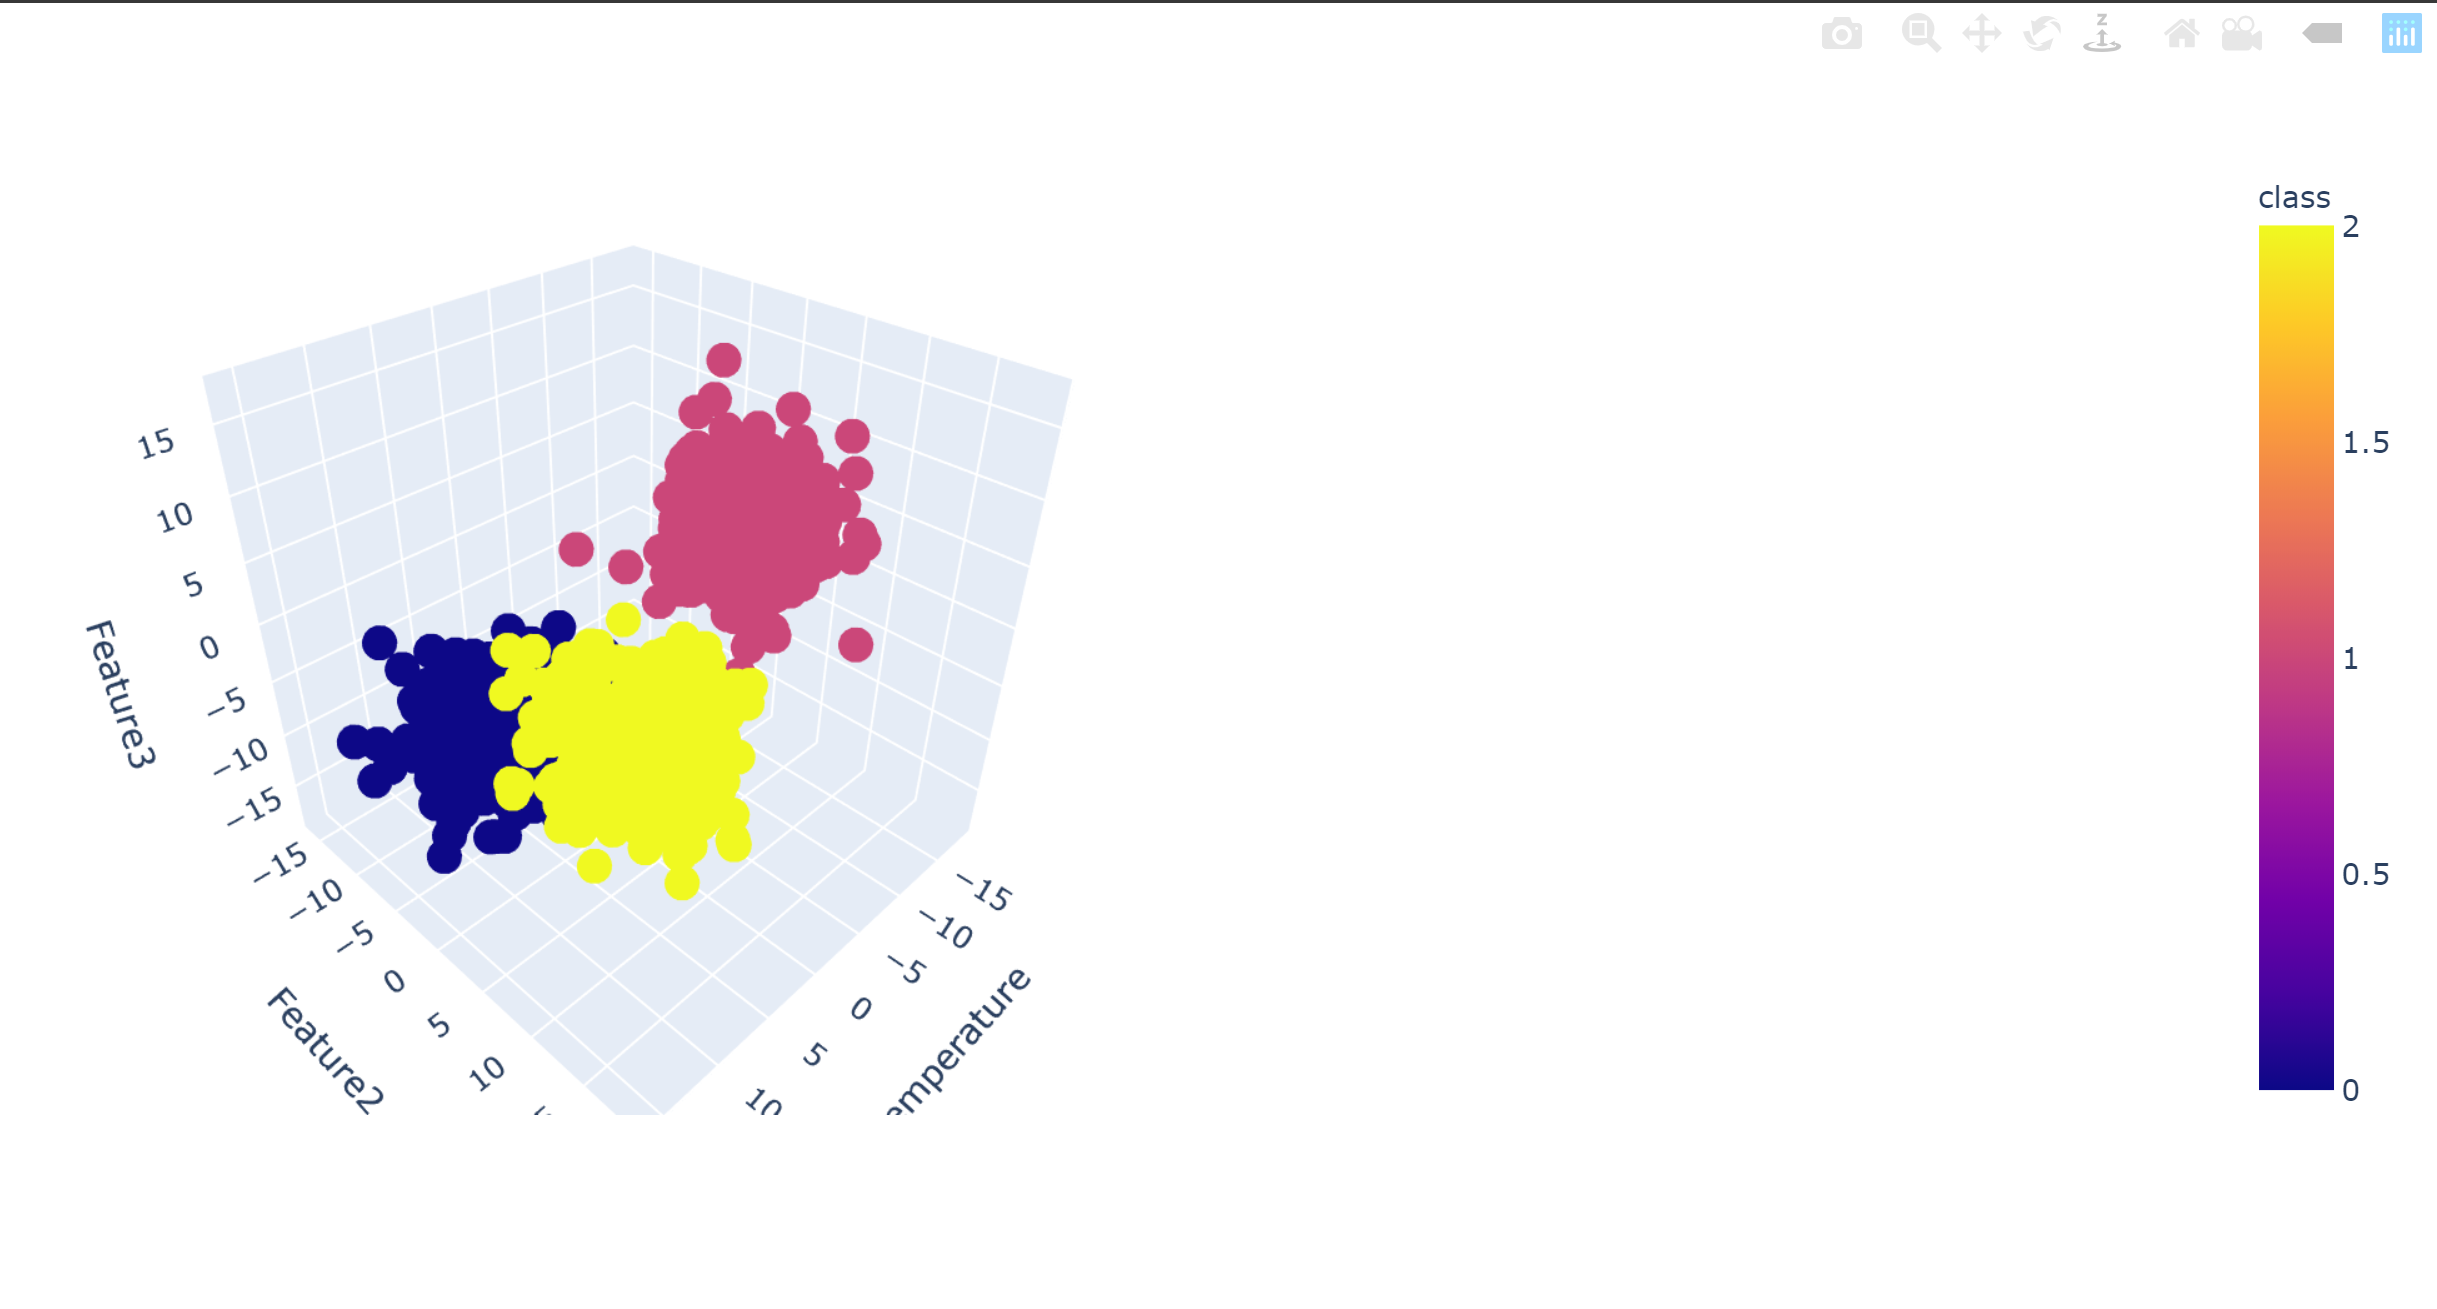

In [24]:
#hvplot should work in google colab as coded but the output will look like the picture below

from IPython.display import Image
Image("/content/gdrive/My Drive/Colab Notebooks/Data Scientist Test/3d plot.png", width=800, height=500)

If you were able to follow along (googling and checking python documenation is totally fine if this 101 intro was a bit tough lol) you are now ready to tackle more algorithms I guess :). Let me know your thoughts on this module. I give similar rundowns to my students when I am going over this material. 